      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6185  8033-VCZGH    Male              0     Yes         No      50   
5270  6682-QJDGB    Male              0      No        Yes      40   
3840  1080-BWSYE    Male              1     Yes         No      64   
2207  4285-GYRQC  Female              0     Yes         No       7   
1584  9906-NHHVC  Female              1      No         No      65   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
6185          Yes               Yes     Fiber optic                  Yes  ...   
5270          Yes                No             DSL                  Yes  ...   
3840          Yes               Yes              No  No internet service  ...   
2207          Yes                No     Fiber optic                   No  ...   
1584           No  No phone service             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
6185                 

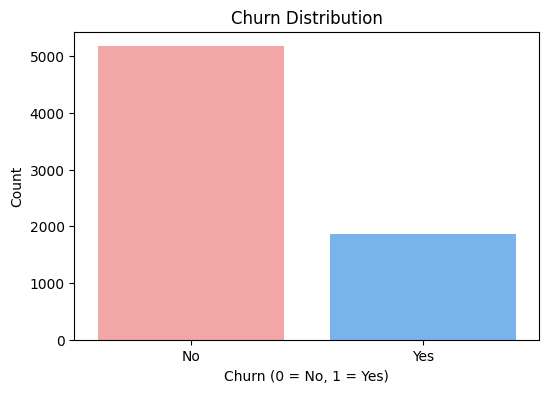

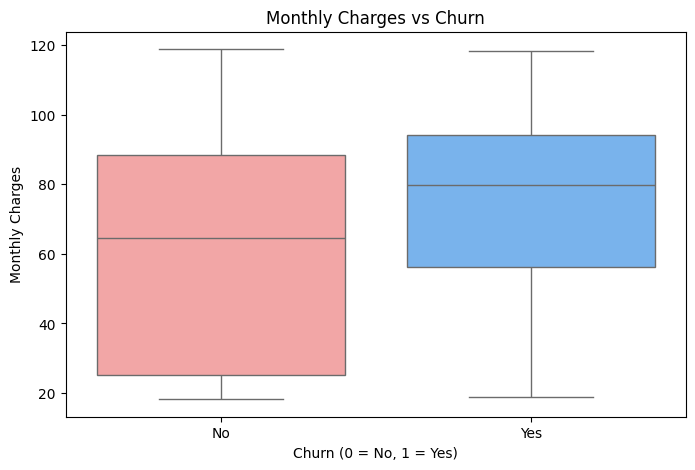

Accuracy: 0.7998580553584103

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[946  90]
 [192 181]]


<Figure size 600x400 with 0 Axes>

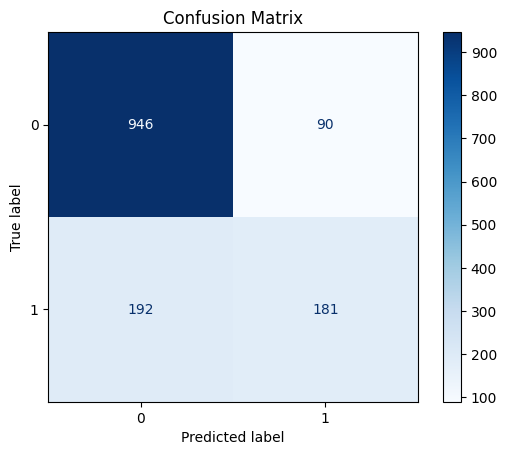

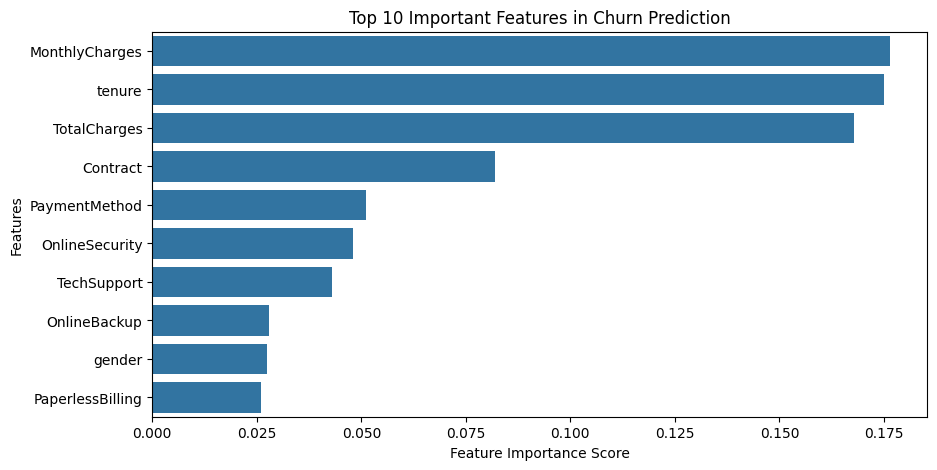

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Dataset overview
print(df.sample(5))
df.info(verbose=True)

# Drop 'customerID' as it's not useful for prediction
df.drop("customerID", axis=1, inplace=True)

# Check missing values if any
print(df.isnull().sum())

# EDA: Churn Distribution in Dataset
plt.figure(figsize=(6,4))
sns.countplot(x=df["Churn"], palette=["#FF9999", "#66B3FF"], hue=df["Churn"], legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# EDA: Monthly Charges vs. Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Churn"], y=df["MonthlyCharges"], palette=["#FF9999", "#66B3FF"], hue=df["Churn"], legend=False)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Analysis
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features in Churn Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()